<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_Dataset_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the Dataset and Prepare testing and training data

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Change the Datatype to Float and Normalize it

In [ ]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [ ]:
x_train.dtype


dtype('float64')

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [ ]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [ ]:
num_classes= len(np.unique(y_train))

In [ ]:
num_classes

10

In [ ]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [ ]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation and Training

In [ ]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [ ]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [ ]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


### Import the Deep Learning Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


### Build a CNN Architecture with Keras

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
____________________________________________________

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

### Stack an ANN on top of CNN

In [ ]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

### Fit the model

In [ ]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 17s - loss: 2.0672 - accuracy: 0.1768 - val_loss: 1.9259 - val_accuracy: 0.2122
Epoch 2/10
 - 15s - loss: 1.8290 - accuracy: 0.2789 - val_loss: 1.7044 - val_accuracy: 0.3436
Epoch 3/10
 - 16s - loss: 1.6593 - accuracy: 0.3640 - val_loss: 1.5962 - val_accuracy: 0.3928
Epoch 4/10
 - 16s - loss: 1.5865 - accuracy: 0.3969 - val_loss: 1.5405 - val_accuracy: 0.4290
Epoch 5/10
 - 15s - loss: 1.5048 - accuracy: 0.4350 - val_loss: 1.5312 - val_accuracy: 0.4342
Epoch 6/10
 - 15s - loss: 1.4607 - accuracy: 0.4591 - val_loss: 1.4460 - val_accuracy: 0.4740
Epoch 7/10
 - 15s - loss: 1.4069 - accuracy: 0.4852 - val_loss: 1.4318 - val_accuracy: 0.4890
Epoch 8/10
 - 14s - loss: 1.3705 - accuracy: 0.5006 - val_loss: 1.3595 - val_accuracy: 0.5178
Epoch 9/10
 - 14s - loss: 1.3145 - accuracy: 0.5248 - val_loss: 1.3218 - val_accuracy: 0.5278
Epoch 10/10
 - 14s - loss: 1.2571 - accuracy: 0.5470 - val_loss: 1.3688 - val_accuracy: 0.5244


### Evaluate the Results

In [ ]:
results=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 201us/step


In [ ]:
results

[1.3808527185440063, 0.5141000151634216]

In [ ]:
answers.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

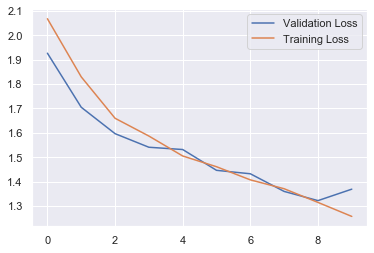

In [ ]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

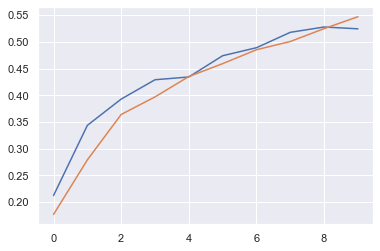

In [ ]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;